# Project 9 : Restaurant Revenue Prediction
In this project, you are going to work on the "Restaurant revenue" dataset which
contains 100 observations of restaurants with 8 attributes.

### 1.Importing basic data analytics libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
rev_pred = pd.read_csv("revenue_prediction.csv")

In [22]:
rev_pred.shape

(100, 8)

In [23]:
rev_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [24]:
rev_pred.head(10)

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715
5,106,Maggiano'sLittleItaly,Yes,Seafood,Noida,56,4.9,4517319
6,107,Cicis,Yes,Steak,Noida,58,5.0,5966635
7,108,LongJohnSilver's,Yes,Pizza,Mumbai,49,4.3,6491607
8,109,SaltgrassSteakHouse,Yes,Mexican,Mumbai,59,4.8,5152497
9,110,ChuckE.Cheese's,Yes,Steak,Pune,76,5.3,4544227


### Dataset Attributes:
1. ID - Restaurant ID
2. Name - Name of the Restaurant
3. Franchise - Restaurant has franchise or not
4. Category - specific type of category provided by restaurant
5. No_of_item - Different types of items provided by restaurant
6. Order_Placed - Order placed by customer to restaurant (in lacs)
7. Revenue - Total amount of income generated by the restaurant

### 2.Does data has null values, unique values???

In [25]:
rev_pred.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

In [26]:
rpu = rev_pred.Name.unique()

unique_values, value_counts = np.unique(rpu, return_counts=True)

for value, count in zip(unique_values, value_counts):
    print(f"{value}: {count}")

A&WAll-AmericanFood: 1
AuBonPain: 1
BahamaBreezeIslandGrille: 1
BarLouie: 1
Benihana: 1
BigBoy/Frisch'sBigBoy: 1
BlackBearDiner: 1
BlazePizza: 1
Braum'sIceCream&DairyStores: 1
BrioTuscanGrille: 1
BubbaGumpShrimpCo.: 1
BucadiBeppo: 1
CafeRioMexicanGrill: 1
CaribouCoffee: 1
CharleysPhillySteaks: 1
ChuckE.Cheese's: 1
Chuy's: 1
Cicis: 1
Cinnabon: 1
ClaimJumper: 1
ColdStoneCreamery: 1
Cooper'sHawkWinery&Restaurants: 1
CornerBakery_Cafe: 1
DelFrisco'sDoubleEagleSteakHouse: 1
Dickey'sBarbecuePit: 1
DonatosPizza: 1
FamousDave's: 1
FarmerBoys: 1
Fazoli's: 1
FirebirdsWoodFiredGrill: 1
Fleming'sPrimeSteakhouse&WineBar: 1
FogodeChao: 1
Friendly's: 1
Fuddruckers: 1
Fuzzy'sTacoShop: 1
Giordano's: 1
Godfather'sPizza: 1
GoldenChick: 1
HardRockCafe: 1
HuddleHouse: 1
HungryHowie'sPizza: 1
IslandsFineBurgers&Drinks: 1
J.Alexander's: 1
Jack's: 1
Jet'sPizza: 1
JohnnyRockets: 1
KrystalCo.: 1
LaMadeleineCountryFrenchCafe: 1
LazyDogRestaurant&Bar: 1
LePainQuotidien: 1
LegalSeaFoods: 1
LongJohnSilver's: 1
Luby

In [50]:
# Droping the unwanted columns s a part of feature engineering.
rev_pred.drop(['Id'], axis = 1, inplace = True)  

### 3.Visualization Time....

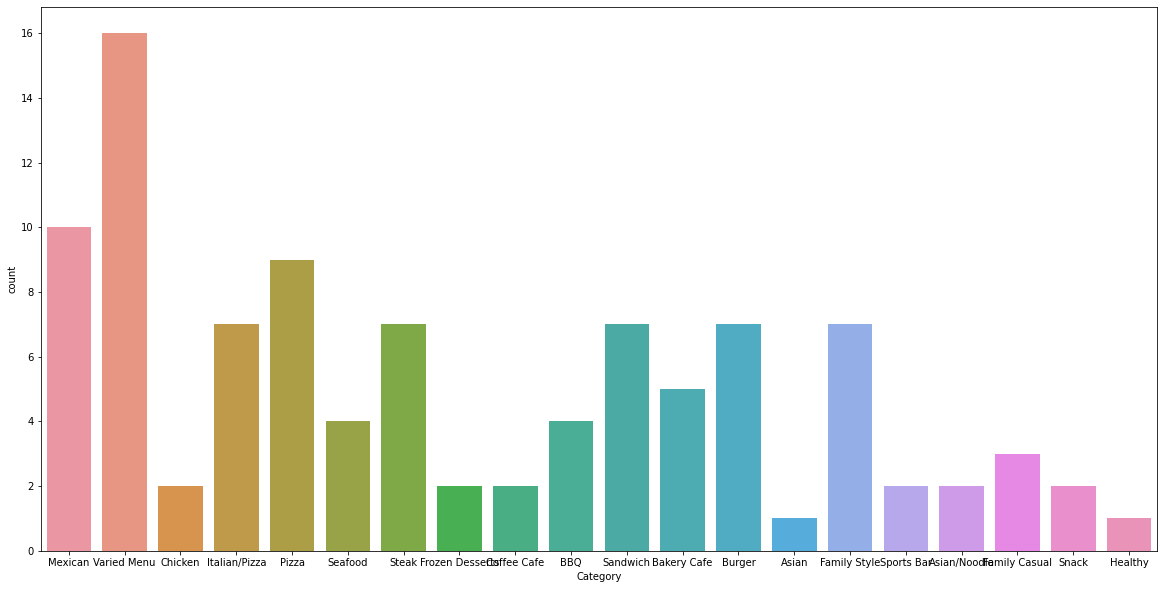

In [38]:
plt.figure(figsize= (20, 10))
sns.countplot(data= rev_pred, x = 'Category')

plt.show()

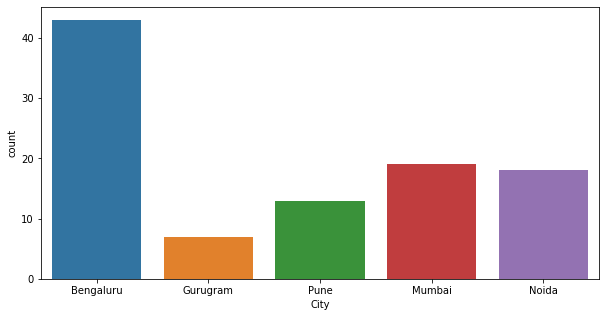

In [41]:
plt.figure(figsize= (10, 5))
sns.countplot(data= rev_pred, x = 'City')
plt.show()

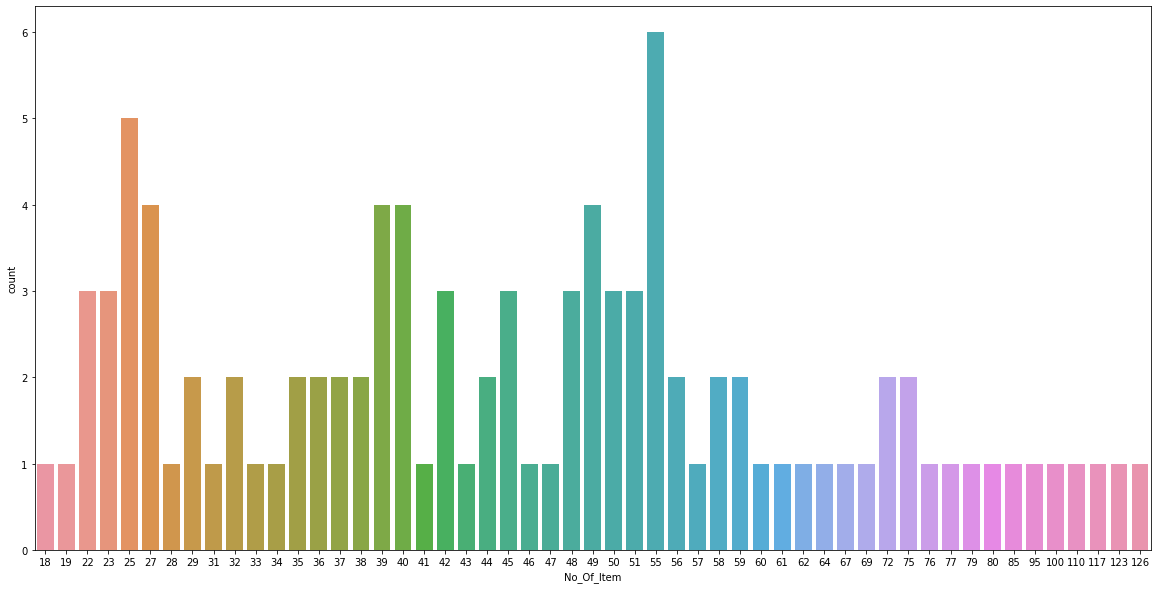

In [42]:
plt.figure(figsize= (20, 10))
sns.countplot(data= rev_pred, x = 'No_Of_Item')
plt.show()

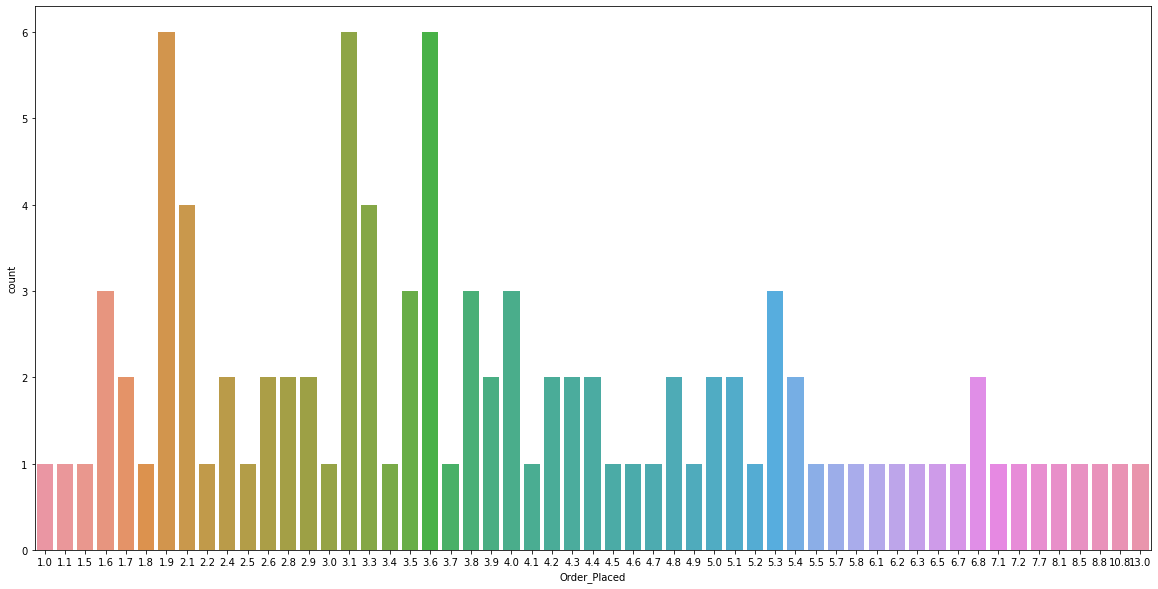

In [43]:
plt.figure(figsize= (20, 10))
sns.countplot(data= rev_pred, x = 'Order_Placed')
plt.show()

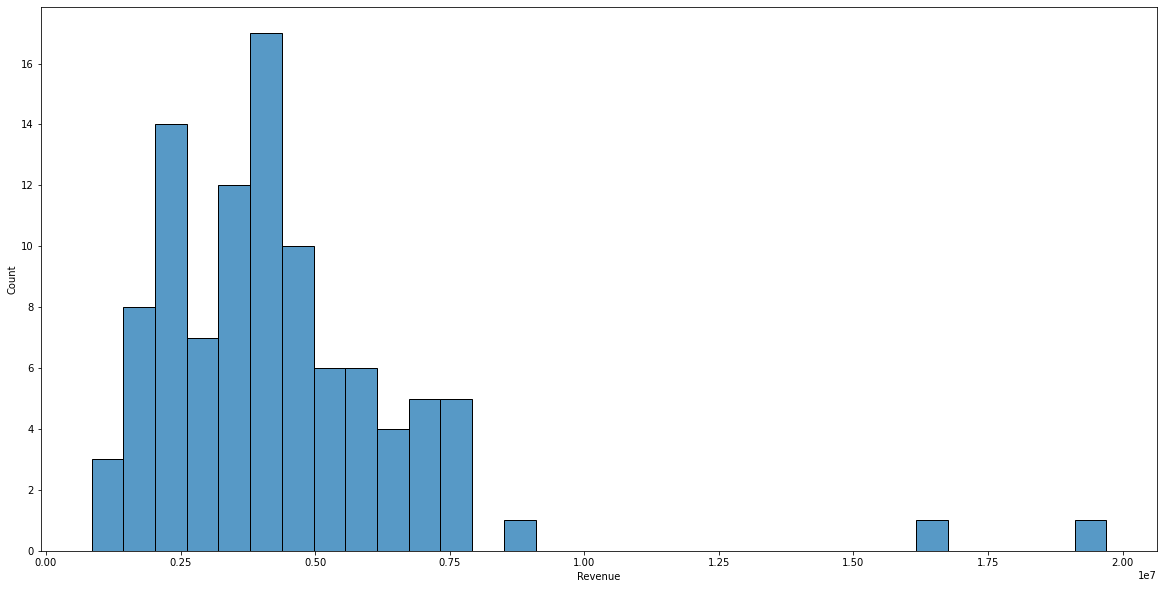

In [51]:
plt.figure(figsize= (20, 10))
sns.histplot(data= rev_pred, x = 'Revenue', bins = 32)
plt.show()

In [56]:
corr_mat = rev_pred.corr()
corr_mat

,No_Of_Item,Order_Placed,Revenue
No_Of_Item,1.000000,0.973335,0.892194
Order_Placed,0.973335,1.000000,0.929407
Revenue,0.892194,0.929407,1.000000


<AxesSubplot:>

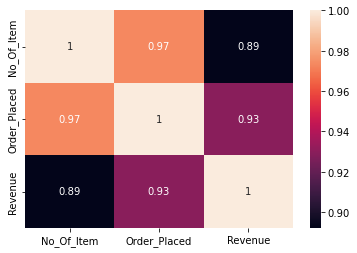

In [58]:
sns.heatmap(corr_mat,annot=True)

<AxesSubplot:xlabel='City', ylabel='Revenue'>

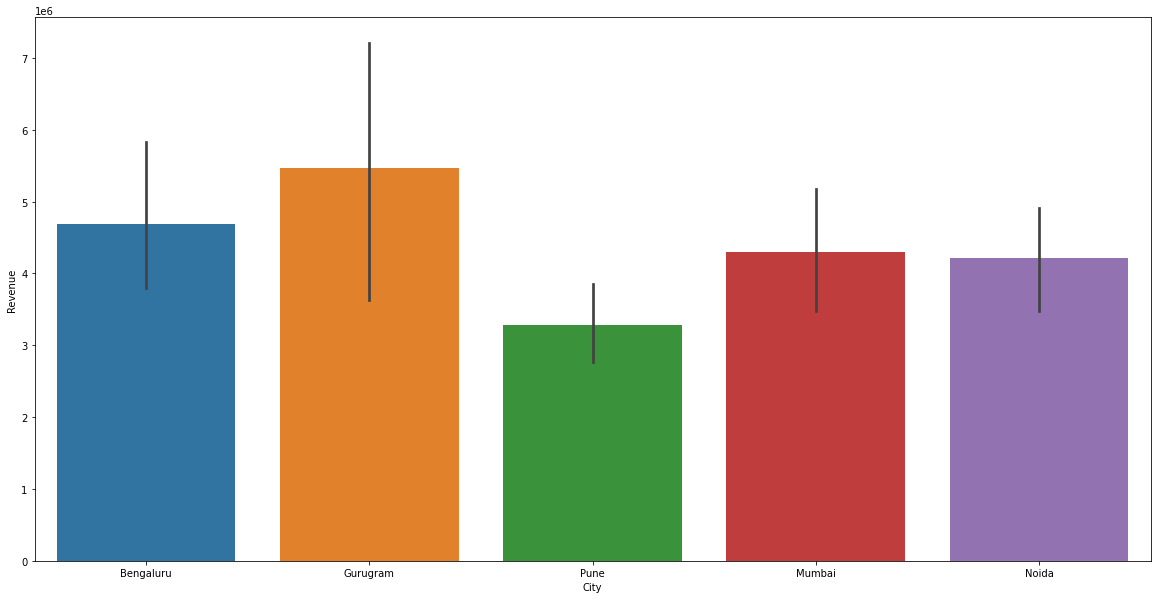

In [63]:
plt.figure(figsize= (20, 10))
sns.barplot(data = rev_pred, x = 'City' , y = 'Revenue')

<AxesSubplot:xlabel='No_Of_Item', ylabel='Revenue'>

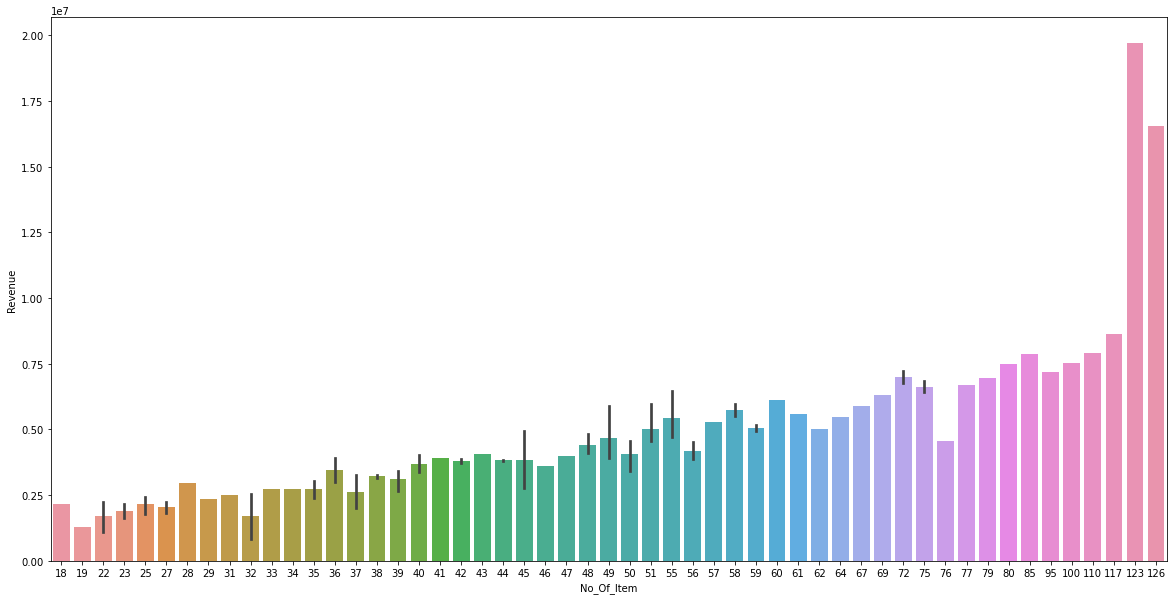

In [61]:
plt.figure(figsize= (20, 10))
sns.barplot(data = rev_pred, x = 'No_Of_Item' , y = 'Revenue')

<AxesSubplot:xlabel='Order_Placed', ylabel='Revenue'>

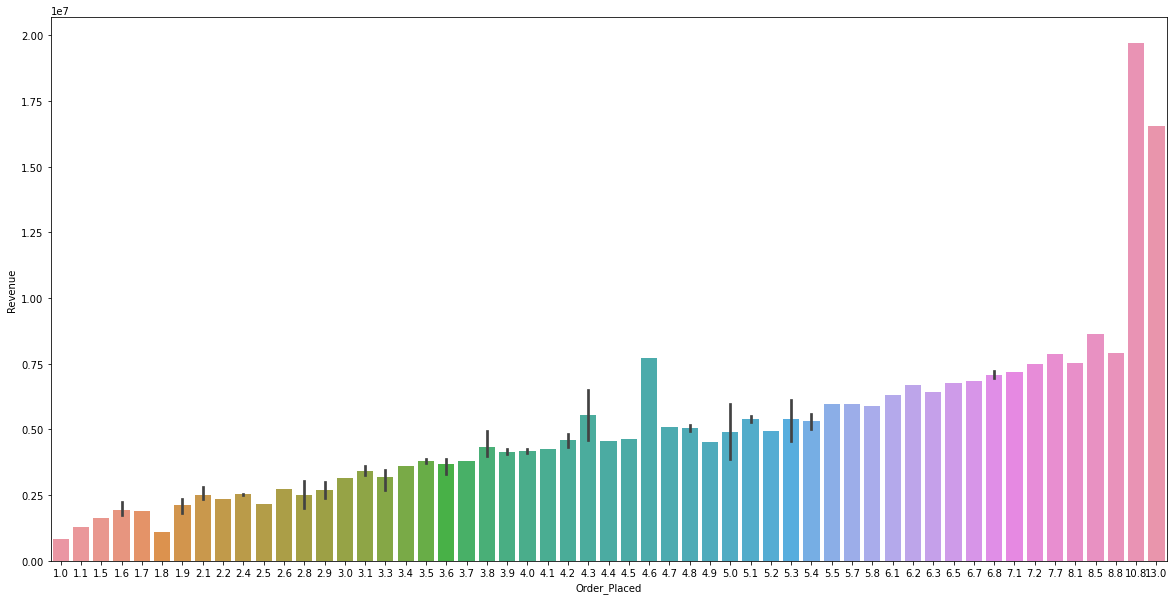

In [64]:
plt.figure(figsize= (20, 10))
sns.barplot(data = rev_pred, x = 'Order_Placed' , y = 'Revenue')

<AxesSubplot:xlabel='Revenue', ylabel='Name'>

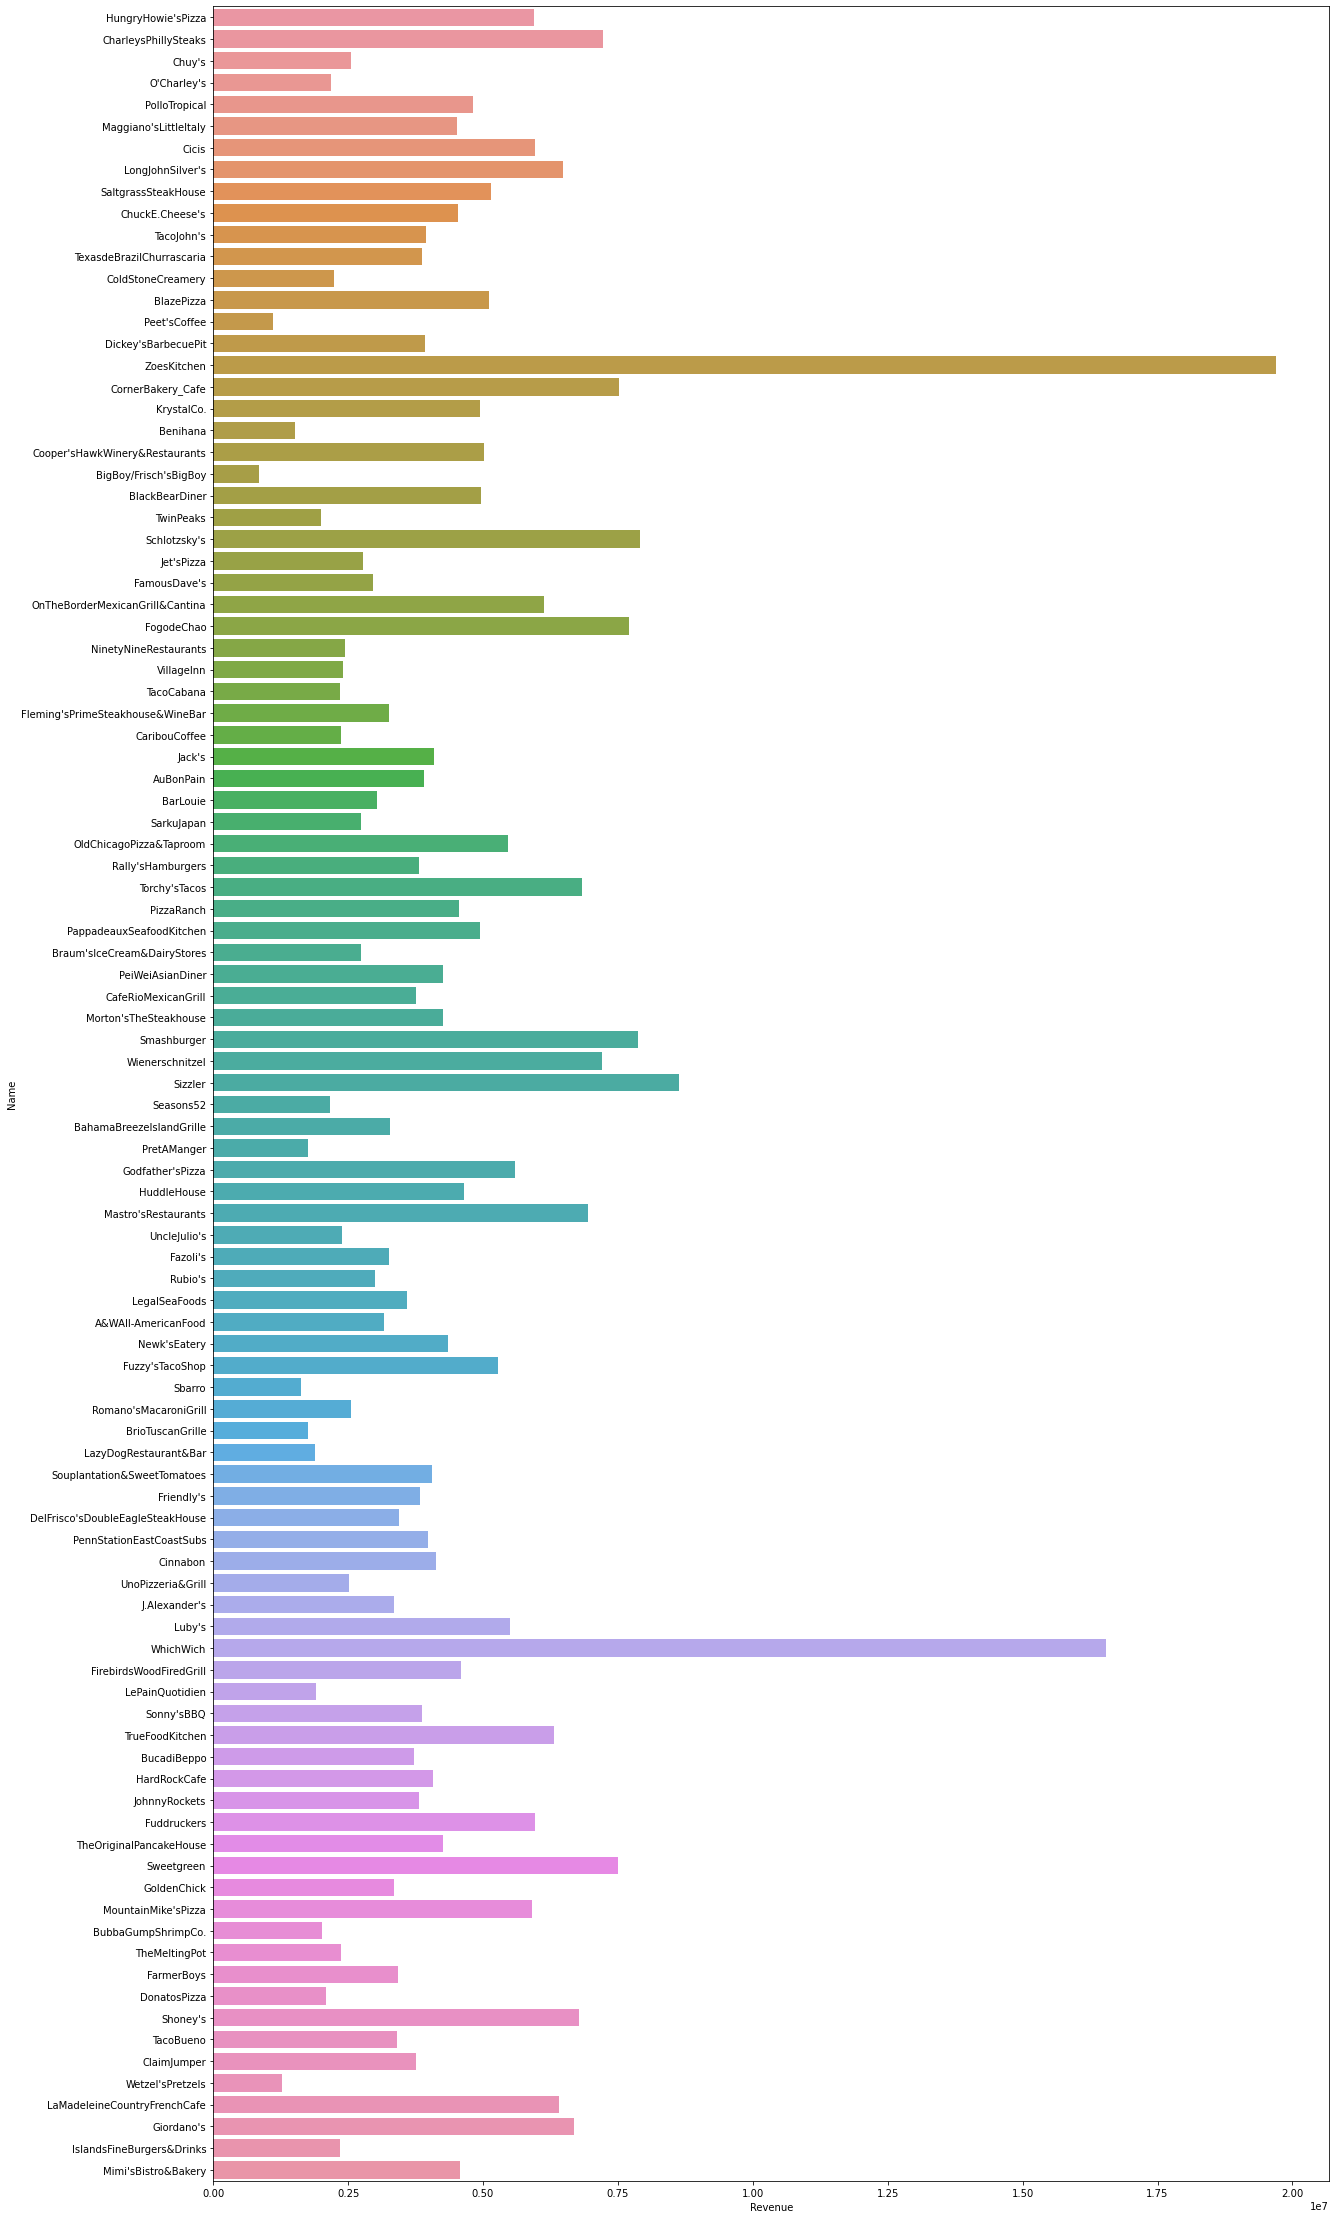

In [78]:
plt.figure(figsize= (20, 40))
sns.barplot(data = rev_pred, x = 'Revenue' , y = 'Name' )

<AxesSubplot:xlabel='Category', ylabel='Revenue'>

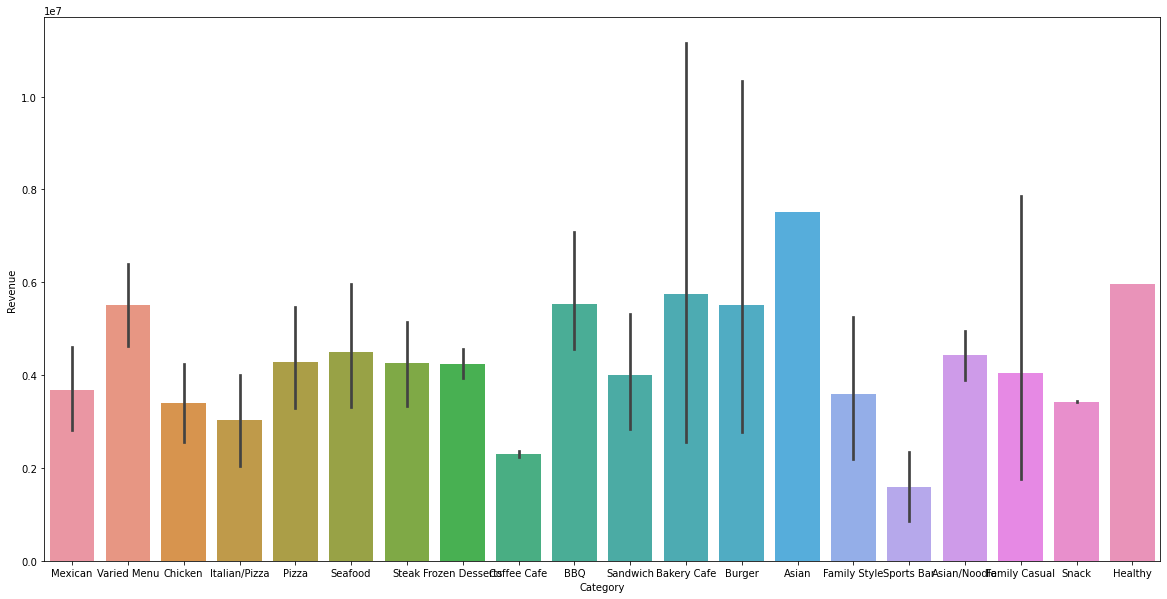

In [79]:
plt.figure(figsize= (20, 10))
sns.barplot(data = rev_pred, x = 'Category' , y = 'Revenue')

<AxesSubplot:xlabel='Category', ylabel='No_Of_Item'>

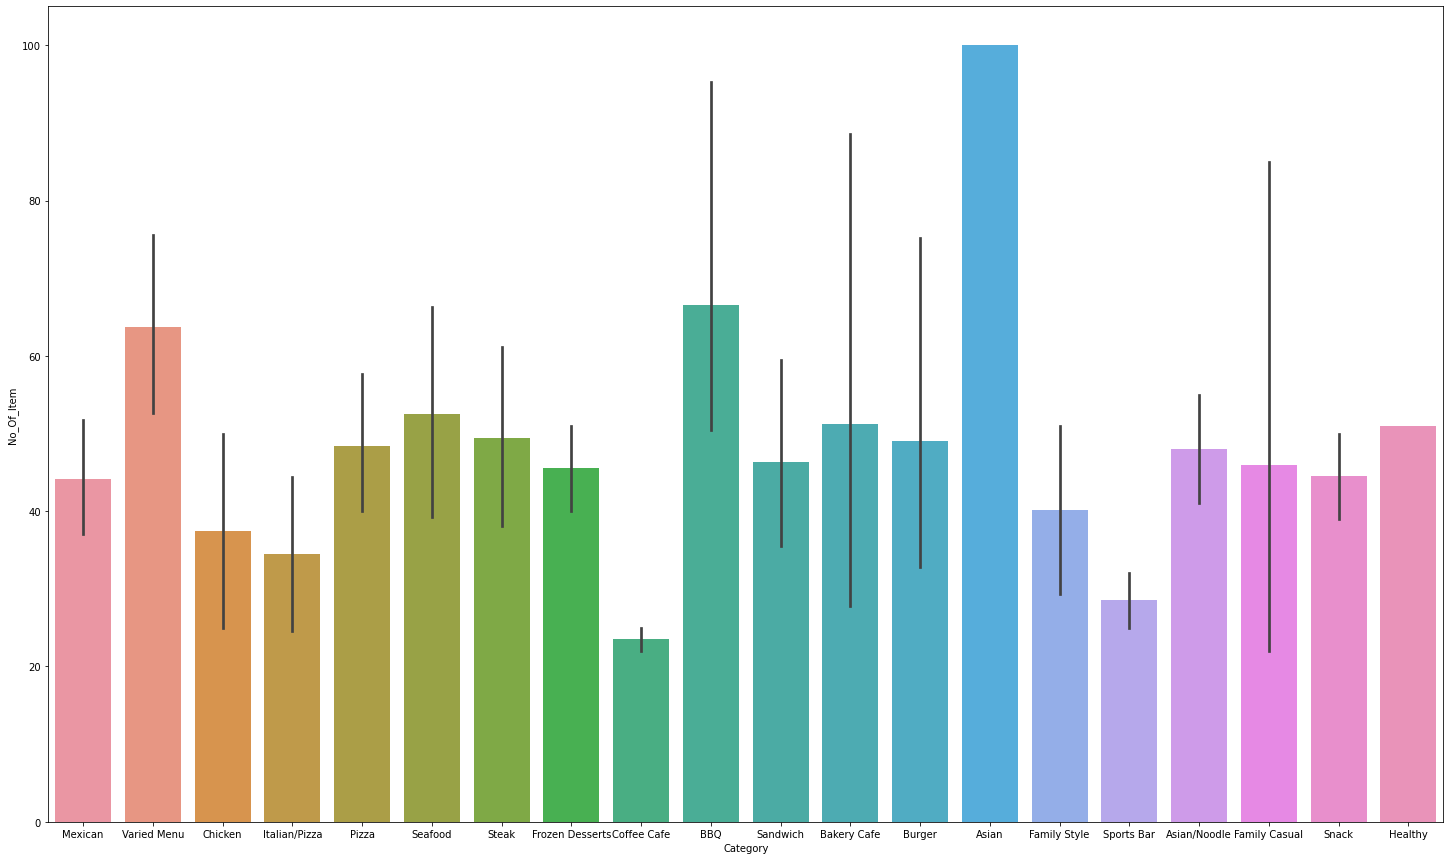

In [83]:
plt.figure(figsize= (25, 15))
sns.barplot(data = rev_pred, x = 'Category' , y = 'No_Of_Item')

<AxesSubplot:xlabel='Category', ylabel='Order_Placed'>

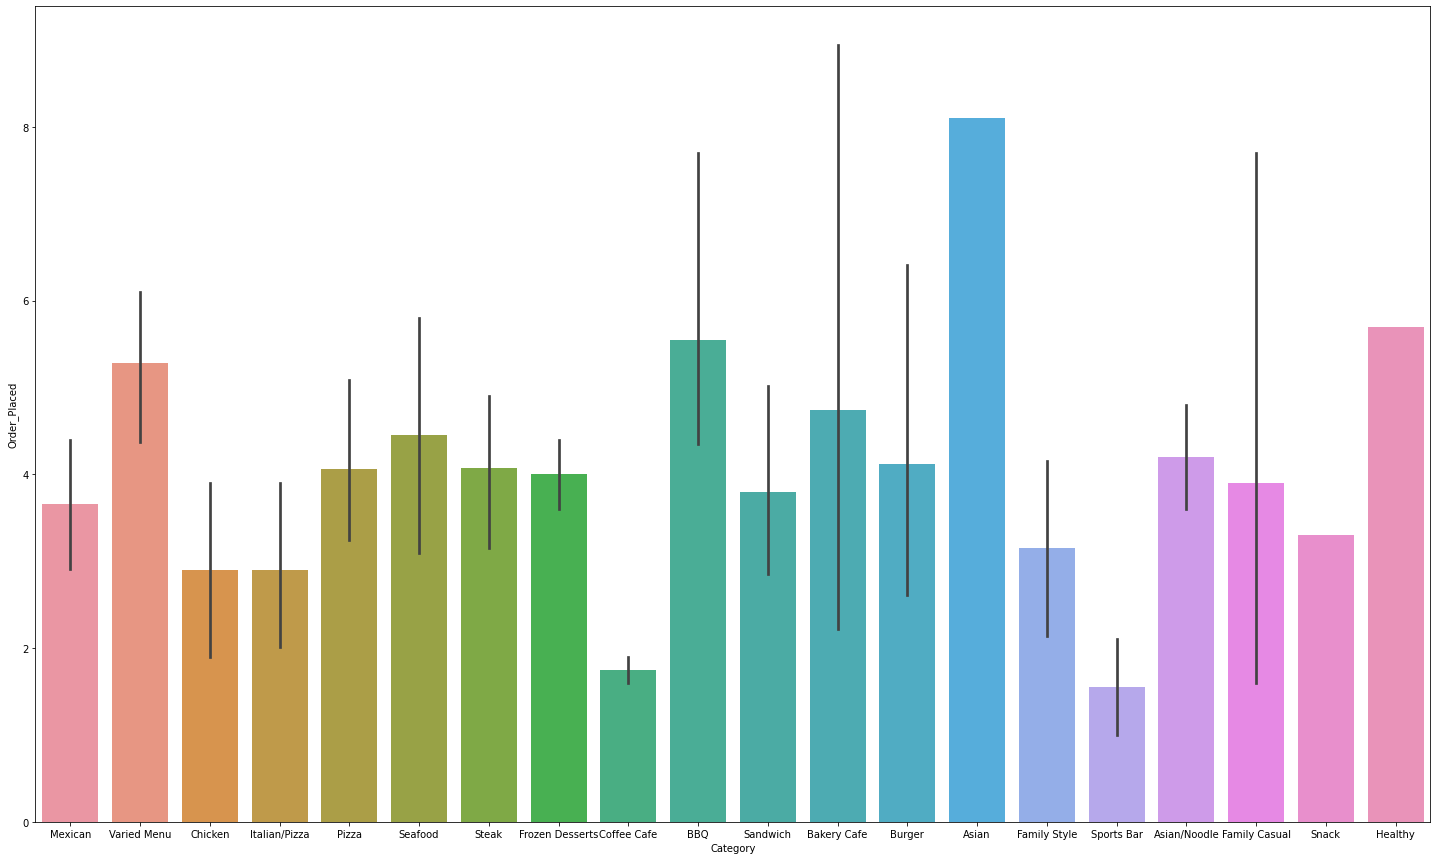

In [85]:
plt.figure(figsize= (25, 15))
sns.barplot(data = rev_pred, x = 'Category' , y = 'Order_Placed')

### 4. Model building and predictions

In [86]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [87]:
le = LabelEncoder()

In [91]:
enc_col_category = le.fit_transform(rev_pred['Category'])
enc_col_city = le.fit_transform(rev_pred['City'])

In [92]:
rev_pred['Category'] = enc_col_category
rev_pred['City'] = enc_col_city
rev_pred.head()

,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,HungryHowie'sPizza,Yes,12,0,55,5.5,5953753
1,CharleysPhillySteaks,No,19,1,72,6.8,7223131
2,Chuy's,Yes,5,4,25,1.9,2555379
3,O'Charley's,Yes,11,2,18,2.5,2175511
4,PolloTropical,Yes,13,3,48,4.2,4816715


In [94]:
X, y = rev_pred.iloc[:, 2:-1], rev_pred.iloc[:, -1]

In [98]:
X_train,X_test,y_train, y_test = train_test_split(X, y, random_state= 20, train_size = 0.7)

In [99]:
linreg = LinearRegression()

In [100]:
linreg.fit(X_train, y_train)

LinearRegression()

In [101]:
y_pred1 = linreg.predict(X_test)

In [102]:
#R2 Score is a statistical measure that indicates the proportion of the variance in the dependent variable 
#that can be explained by the independent variables in a regression model.
r2 = r2_score(y_test, y_pred1)
r2

0.932579121444584

In [103]:
linreg.score(X_test, y_test)

0.932579121444584

In [104]:
#MAE is a metric that calculates the average absolute difference between the predicted values and the true values.
#It measures the average magnitude of the errors without considering their direction.
mae = mean_absolute_error(y_test, y_pred1)
mae

452143.6405284053

In [105]:
#MSE is a metric that measures the average squared difference between the predicted values and the true values. 
#It considers both the magnitude and direction of the errors. 
#MSE is widely used in regression tasks and is particularly useful when larger errors are more important than smaller errors.
mse = mean_squared_error(y_test, y_pred1)
mse

272420903362.1121

### 5. For better idea of regression, visualizing for better understanding!

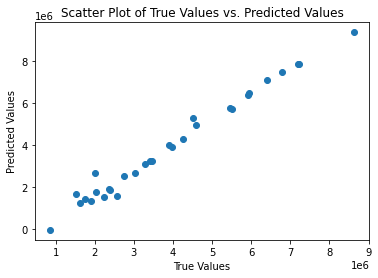

In [107]:
plt.scatter(y_test, y_pred1)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True Values vs. Predicted Values')
plt.show()

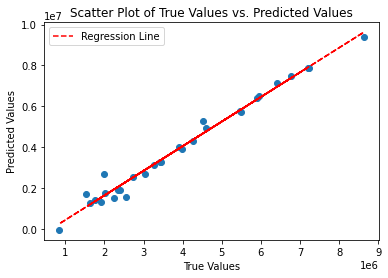

In [110]:
regression_line = np.polyfit(y_test, y_pred1, deg=1)
line_fn = np.poly1d(regression_line)
plt.scatter(y_test, y_pred1)
plt.plot(y_test, line_fn(y_test), color='red', linestyle='--', label='Regression Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True Values vs. Predicted Values')
plt.legend()
plt.show()